# Real World Example

In [1]:
import numpy as np
import scipy.stats as stats
import math
from PIL import Image
import matplotlib.pyplot as plt
from IBP_Sampler_Package.IBP_Sampler import IBP, log_likelyhood, sampler

For this real world example, we will use images of each number of a dice

## Experiment 1

### Setup: Create X using the images of dice

In [2]:
#Convert each dice to an array
One = np.array(Image.open('One.png').convert('L'))
Two = np.array(Image.open('Two.png').convert('L'))
Three = np.array(Image.open("Three.png").convert("L"))
Four = np.array(Image.open("Four.png").convert("L"))
Five = np.array(Image.open("Five.png").convert("L"))
Six = np.array(Image.open("Six.png").convert("L"))
#Make sure it is binary
One[One > 0] = 1
Two[Two > 0] = 1
Three[Three > 0] = 1
Four[Four > 0] = 1
Five[Five > 0] = 1
Six[Six > 0] = 1
#Reduce the dimensions
One = One[25:200:5,25:200:5]
Two = Two[25:200:5,25:200:5]
Three = Three[25:200:5,25:200:5]
Four = Four[25:200:5,25:200:5]
Five = Five[25:200:5,25:200:5]
Six = Six[25:200:5,25:200:5]

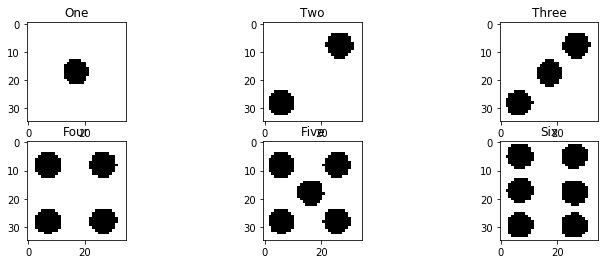

In [3]:
#Plot Dice for Reference
fig, ax = plt.subplots(2, 3,figsize = (12,4))
ax[0,0].imshow(One,cmap = "gray")
ax[0,0].set_title("One")
ax[0,1].imshow(Two,cmap = "gray")
ax[0,1].set_title("Two")
ax[0,2].imshow(Three,cmap = "gray")
ax[0,2].set_title("Three")
ax[1,0].imshow(Four,cmap = "gray")
ax[1,0].set_title("Four")
ax[1,1].imshow(Five,cmap = "gray")
ax[1,1].set_title("Five")
ax[1,2].imshow(Six,cmap = "gray")
ax[1,2].set_title("Six")
pass

In [4]:
np.random.seed(1)
N = 50
D = One.shape[0]**2
One = One.reshape(D)
Two = Two.reshape(D)
Three = Three.reshape(D)
Four = Four.reshape(D)
Five = Five.reshape(D)
Six = Six.reshape(D)

sigmaX = 0.25

#Create X from basis vectors
One = np.outer(np.random.binomial(1,.5,N),One)
Two = np.outer(np.random.binomial(1,.5,N),Two)
Three = np.outer(np.random.binomial(1,.5,N),Three)
Four = np.outer(np.random.binomial(1,.5,N),Four)
Five = np.outer(np.random.binomial(1,.5,N),Five)
Six = np.outer(np.random.binomial(1,.5,N),Six)
X = One + Two + Three + Four + Five + Six
#Add noise
X = X + np.random.normal(0,sigmaX,(N,D))

### Simulation: Run the Gibbs Sampler for X

In [5]:
np.random.seed(2)
Ks,Alpha,SXs,SAs,Z = sampler(X,alpha = 1,niter = 500,epsilon = .05,sigma_X =.4,sigma_A = .5,alpha_a_prior = 1,alpha_b_prior = 1,max_new = 3)

### Results: Plot the Posterior Mean of the Feature Matrix

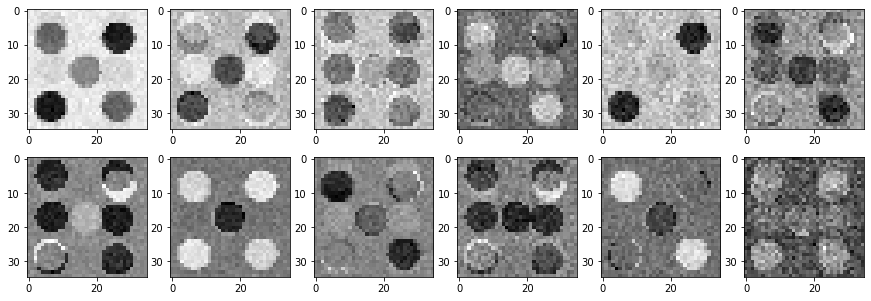

In [6]:
A = np.linalg.inv(Z.T @ Z + SXs[499]**2 / SAs[499]**2 * np.eye(int(Ks[499]))) @ Z.T @ X
fig, ax = plt.subplots(2, 6,figsize = (15,5))
ax[0,0].imshow(A[0].reshape(35,35),cmap = "gray")
ax[0,1].imshow(A[1].reshape(35,35),cmap = "gray")
ax[0,2].imshow(A[2].reshape(35,35),cmap = "gray")
ax[0,3].imshow(A[3].reshape(35,35),cmap = "gray")
ax[0,4].imshow(A[4].reshape(35,35),cmap = "gray")
ax[0,5].imshow(A[5].reshape(35,35),cmap = "gray")
ax[1,0].imshow(A[6].reshape(35,35),cmap = "gray")
ax[1,1].imshow(A[7].reshape(35,35),cmap = "gray")
ax[1,2].imshow(A[8].reshape(35,35),cmap = "gray")
ax[1,3].imshow(A[9].reshape(35,35),cmap = "gray")
ax[1,4].imshow(A[10].reshape(35,35),cmap = "gray")
ax[1,5].imshow(A[11].reshape(35,35),cmap = "gray")
# fig.delaxes(ax[1,5])
pass

### Results: Plot the values of K, $\alpha$, $\sigma_X$,$\sigma_A$ over the iterations

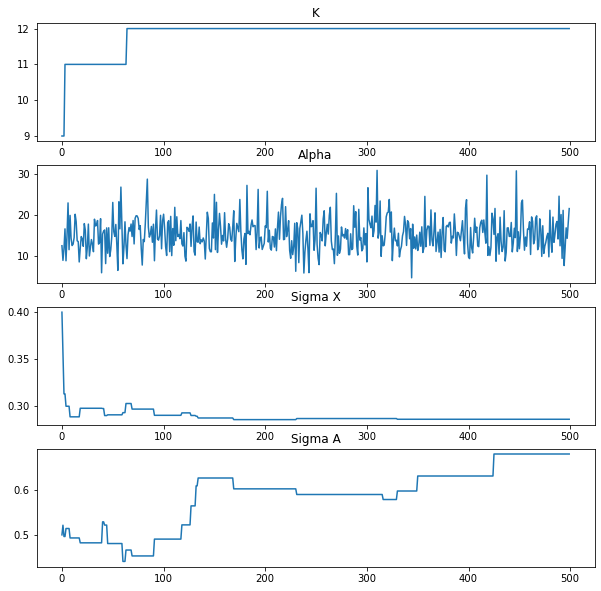

In [7]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1,figsize = (10,10))
ax1.plot(Ks)
ax1.set_title("K")
ax2.plot(Alpha)
ax2.set_title("Alpha")
ax3.plot(SXs)
ax3.set_title("Sigma X")
ax4.plot(SAs)
ax4.set_title("Sigma A")
pass

## Experiment 2

### Setup: Create X using the images of dice

In [8]:
#Convert each dice to an array
One = np.array(Image.open('One.png').convert('L'))
Two = np.array(Image.open('Two.png').convert('L'))
Three = np.array(Image.open("Three.png").convert("L"))
Four = np.array(Image.open("Four.png").convert("L"))
Five = np.array(Image.open("Five.png").convert("L"))
Six = np.array(Image.open("Six.png").convert("L"))
#Make sure it is binary
One[One > 0] = 1
Two[Two > 0] = 1
Three[Three > 0] = 1
Four[Four > 0] = 1
Five[Five > 0] = 1
Six[Six > 0] = 1
#Reduce the dimensions
One = One[25:200:5,25:200:5]
Two = Two[25:200:5,25:200:5]
Three = Three[25:200:5,25:200:5]
Four = Four[25:200:5,25:200:5]
Five = Five[25:200:5,25:200:5]
Six = Six[25:200:5,25:200:5]

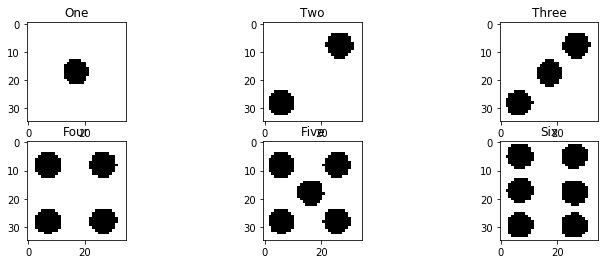

In [9]:
#Plot Dice for Reference
fig, ax = plt.subplots(2, 3,figsize = (12,4))
ax[0,0].imshow(One,cmap = "gray")
ax[0,0].set_title("One")
ax[0,1].imshow(Two,cmap = "gray")
ax[0,1].set_title("Two")
ax[0,2].imshow(Three,cmap = "gray")
ax[0,2].set_title("Three")
ax[1,0].imshow(Four,cmap = "gray")
ax[1,0].set_title("Four")
ax[1,1].imshow(Five,cmap = "gray")
ax[1,1].set_title("Five")
ax[1,2].imshow(Six,cmap = "gray")
ax[1,2].set_title("Six")
pass

In [10]:
np.random.seed(1)
N = 50
D = One.shape[0]**2
One = One.reshape(D)
Two = Two.reshape(D)
Three = Three.reshape(D)
Four = Four.reshape(D)
Five = Five.reshape(D)
Six = Six.reshape(D)

sigmaX = 0.25

#Create X from basis vectors
One = np.outer(np.random.binomial(1,.5,N),One)
Two = np.outer(np.random.binomial(1,.5,N),Two)
Three = np.outer(np.random.binomial(1,.5,N),Three)
Four = np.outer(np.random.binomial(1,.5,N),Four)
Five = np.outer(np.random.binomial(1,.5,N),Five)
Six = np.outer(np.random.binomial(1,.5,N),Six)
X = One + Two + Three + Four + Five + Six
#Add noise
X = X + np.random.normal(0,sigmaX,(N,D))

### Simulation: Run the Gibbs Sampler for X

In [11]:
np.random.seed(5)
Ks,Alpha,SXs,SAs,Z = sampler(X,alpha = 1,niter = 500,epsilon = .05,sigma_X =.4,sigma_A = .5,alpha_a_prior = 1,alpha_b_prior = 1,max_new = 3)

### Results: Plot the Posterior Mean of the Feature Matrix

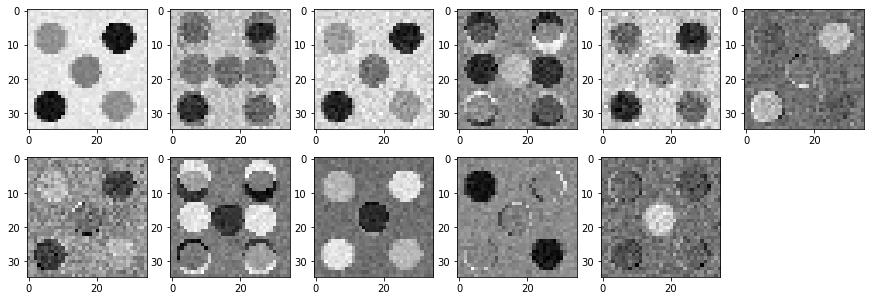

In [12]:
A = np.linalg.inv(Z.T @ Z + SXs[499]**2 / SAs[499]**2 * np.eye(int(Ks[499]))) @ Z.T @ X
fig, ax = plt.subplots(2, 6,figsize = (15,5))
ax[0,0].imshow(A[0].reshape(35,35),cmap = "gray")
ax[0,1].imshow(A[1].reshape(35,35),cmap = "gray")
ax[0,2].imshow(A[2].reshape(35,35),cmap = "gray")
ax[0,3].imshow(A[3].reshape(35,35),cmap = "gray")
ax[0,4].imshow(A[4].reshape(35,35),cmap = "gray")
ax[0,5].imshow(A[5].reshape(35,35),cmap = "gray")
ax[1,0].imshow(A[6].reshape(35,35),cmap = "gray")
ax[1,1].imshow(A[7].reshape(35,35),cmap = "gray")
ax[1,2].imshow(A[8].reshape(35,35),cmap = "gray")
ax[1,3].imshow(A[9].reshape(35,35),cmap = "gray")
ax[1,4].imshow(A[10].reshape(35,35),cmap = "gray")
#ax[1,5].imshow(A[11].reshape(35,35),cmap = "gray")
fig.delaxes(ax[1,5])
pass

### Results: Plot the values of K, $\alpha$, $\sigma_X$,$\sigma_A$ over the iterations

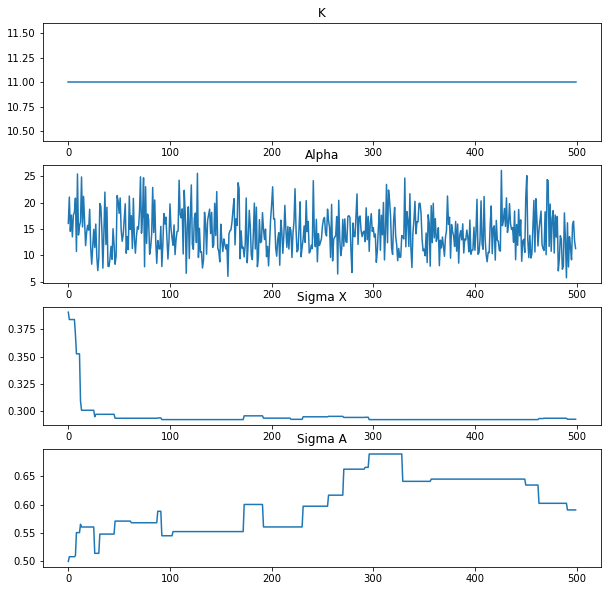

In [13]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1,figsize = (10,10))
ax1.plot(Ks)
ax1.set_title("K")
ax2.plot(Alpha)
ax2.set_title("Alpha")
ax3.plot(SXs)
ax3.set_title("Sigma X")
ax4.plot(SAs)
ax4.set_title("Sigma A")
pass